# Исследовательский анализ данных (учебный проект):
# крупный онлайн-сервис по продаже билетов на мероприятия, лето-осень 2024

- Автор: Руслан Васильев
- Дата: 2025-08-27

## Цель проекта

В ходе проекта необходимо исследовать данные о продаже билетов крупного онлайн-сервиса.

Изучив предварительно разработанный дашборд, где отображены динамики основных метрик сервиса за период с 1 июня по 31 октября 2024 года, заказчик запрашивает дополнительное исследование, в ходе которого предстоит:

- проверить и подготовить данные для анализа;
- выявить возможные инсайты об изменении пользовательских предпочтений и популярности событий осенью 2024 года;
- проверить гипотезы о разнице в поведении пользователей с мобильными и стационарными устройствами;
- сформулировать выводы и дать рекомендации

Необходимо будет учесть, что информация о заказах содержится с разными валютами.


## Описание данных

Данные представлены тремя таблицами.

Таблица **`final_tickets_orders_df.csv`** - включает информацию обо всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных. Описание полей:

`order_id` — уникальный идентификатор заказа.
<br>`user_id` — уникальный идентификатор пользователя.
<br>`created_dt_msk` — дата создания заказа (московское время).
<br>`created_ts_msk` — дата и время создания заказа (московское время).
<br>`event_id` — идентификатор мероприятия из таблицы events.
<br>`cinema_circuit` — сеть кинотеатров. Если не применимо, то здесь будет значение 'нет'.
<br>`age_limit` — возрастное ограничение мероприятия.
<br>`currency_code` — валюта оплаты, например rub для российских рублей.
<br>`device_type_canonical` — тип устройства, с которого был оформлен заказ, например mobile для мобильных устройств, desktop для стационарных.
<br>`revenue` — выручка от заказа.
<br>`service_name` — название билетного оператора.
<br>`tickets_count` — количество купленных билетов.
<br>`total` — общая сумма заказа.
<br>`days_since_prev` - количество дней с предыдущей покупки для каждого пользователя. Если покупки не было, то данные содержат пропуск.

Таблица **`final_tickets_events_df`** - содержит информацию о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия. Описание полей:

<br>`event_id` — уникальный идентификатор мероприятия.
<br>`event_name` — название мероприятия. 
<br>`event_type_description` — описание типа мероприятия.
<br>`event_type_main` — основной тип мероприятия: театральная постановка, концерт и так далее.
<br>`organizers` — организаторы мероприятия.
<br>`region_name` — название региона.
<br>`city_name` — название города.
<br>`venue_id` — уникальный идентификатор площадки.
<br>`venue_name` — название площадки.
<br>`venue_address` — адрес площадки.

Таблица **`final_tickets_tenge_df.csv`** с информацией о курсе тенге к российскому рублю за 2024 год. Значения в рублях представлено для 100 тенге. Описание полей:

<br>`nominal` — номинал (100 тенге).
<br>`data` — дата.
<br>`curs` — курс тенге к рублю.
<br>`cdx` — обозначение валюты (kzt).

## Содержимое проекта

> Загрузка данных и знакомство с ними

> Предобработка данных и подготовка их к исследованию

> Исследовательский анализ данных:
>> Анализ распределения заказов по сегментам и их сезонные изменения
<br> Осенняя активность пользователей
<br> Популярные события и партнёры

> Статистический анализ данных, проверка гипотез о более активных сегментах пользователей

> Вывод и рекомендации

## Шаг 1. Загрузка данных и знакомство с ними

In [1]:
#импорт библиотек для проекта

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

#импорт библиотеки Т-теста Стьюдента для двух выборок
from scipy.stats import ttest_ind

In [2]:
#загружаем файлы в датафреймы
df_orders = pd.read_csv(NDA)
df_events = pd.read_csv(NDA)
df_tenge = pd.read_csv(NDA)

In [3]:
#сохраним количество строк датафрейма с заказами в переменную
df_orders_size = df_orders.shape[0]

# взглянем на общее описание и начало данных датафрейма df_orders
df_orders.info()
df_orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


Всего **290849** строк. Данные на первый взгляд соответствуют описанию. Пустые значения только в столбце days_since_prev, как и сказано в описании полей таблицы. Для полей с датами и категориями можно попытаться оптимизировать тип данных, а также для поля tickets_count (числовое поле с целым числом малой разрядности).

In [4]:
#проверим уникальность значений в ключевом поле
if df_orders.shape[0] == df_orders['order_id'].nunique():
    print('Все значения в поле order_id уникальны.')
else:
    print('Значения в поле order_id не уникальны!')

Все значения в поле order_id уникальны.


In [5]:
#проверим наличие аномалий в полях с датами и числами

columns = ['created_dt_msk', 'created_ts_msk', 'age_limit' , 'revenue', 'tickets_count', 'days_since_prev']
for column in columns:
    print(column, df_orders[column].min(), df_orders[column].max())

created_dt_msk 2024-06-01 2024-10-31
created_ts_msk 2024-06-01 00:00:42 2024-10-31 23:59:54
age_limit 0 18
revenue -90.76 81174.54
tickets_count 1 57
days_since_prev 0.0 148.0


Замечаем наличие отрицательных значений выручки. По данным значениям следует уточнить информацию у заказчика, или дополнительно исследовать, возможно, эти строки в анализе не нужны.

In [6]:
# взглянем на общее описание и начало данных датафрейма df_events
df_events.info()
df_events.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


Всего **22427** строк. Данные на первый взгляд соответствуют описанию. Пустые значения отсутствуют. Для полей с категориями можно попытаться оптимизировать тип данных.

In [7]:
#проверим уникальность значений в ключевом поле
if df_events.shape[0] == df_events['event_id'].nunique():
    print('Все значения в поле event_id уникальны.')
else:
    print('Значения в поле event_id не уникальны!')

Все значения в поле event_id уникальны.


In [8]:
# взглянем на общее описание и начало данных датафрейма df_tenge
df_tenge.info()
df_tenge.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


Всего **357** строк. Данные на первый взгляд соответствуют описанию. Пустые значения отсутствуют. Для полей nominal и cdx можно попытаться оптимизировать тип данных. Предположительно, большая часть данных из этой таблицы не потребуется, т.к. для нас актуальны данные только за 5 месяцев (~150 строк). Из описания также следует, что столбцы с обозначением номинала и валюты избыточны (константы).

---

Таблицы загружены и готовы к предобработке. На данном этапе определена необходимость в оптимизации полей, а также следует проверить наличие явных и неявных дубликатов в категориальных данных, и обратить внимание на строки с отрицательной выручкой.

## Шаг 2. Предобработка данных и подготовка их к исследованию

In [9]:
#для удобства работы объединим инфомрацию о заказах, событиях и курсе в один датафрейм
data = pd.merge(df_orders, df_events, on='event_id', how='left')

# проверим результат объединения
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290849 entries, 0 to 290848
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                290849 non-null  int64  
 1   user_id                 290849 non-null  object 
 2   created_dt_msk          290849 non-null  object 
 3   created_ts_msk          290849 non-null  object 
 4   event_id                290849 non-null  int64  
 5   cinema_circuit          290849 non-null  object 
 6   age_limit               290849 non-null  int64  
 7   currency_code           290849 non-null  object 
 8   device_type_canonical   290849 non-null  object 
 9   revenue                 290849 non-null  float64
 10  service_name            290849 non-null  object 
 11  tickets_count           290849 non-null  int64  
 12  total                   290849 non-null  float64
 13  days_since_prev         268909 non-null  float64
 14  event_name          

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,40efeb04-81b7-4135-b41f-708ff00cc64c,событие,выставки,№4850,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4"
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6"
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,2f638715-8844-466c-b43f-378a627c419f,выставка,другое,№5049,Североярская область,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8"
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,10d805d3-9809-4d8a-834e-225b7d03f95d,шоу,стендап,№832,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8"


Объединение успешно. Видим по описанию полей таблицы и пропусков в них, что по некоторым заказам информация о заказах отсутствует. Выведем часть таких заказов на экран для ознакомления.

In [10]:
data[data['event_name'].isna()].head(10)

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
62,6493246,002ec276eee9b0b,2024-10-14,2024-10-14 16:27:53,533222,нет,6,rub,mobile,78.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,6493275,002ec276eee9b0b,2024-10-14,2024-10-14 16:22:38,533222,нет,6,rub,mobile,78.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,6493304,002ec276eee9b0b,2024-10-14,2024-10-14 16:29:20,533222,нет,6,rub,mobile,118.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,8272280,00da083909dc06b,2024-06-07,2024-06-07 17:50:50,530296,нет,18,rub,mobile,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,8272512,00da083909dc06b,2024-06-07,2024-06-07 17:49:16,530296,нет,18,rub,mobile,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239,8272251,00da083909dc06b,2024-06-07,2024-06-07 17:49:32,530296,нет,18,rub,mobile,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,8272338,00da083909dc06b,2024-06-07,2024-06-07 18:31:20,530296,нет,18,rub,mobile,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241,8272367,00da083909dc06b,2024-06-07,2024-06-07 17:48:55,530296,нет,18,rub,mobile,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,8272396,00da083909dc06b,2024-06-07,2024-06-07 17:04:55,530296,нет,18,rub,mobile,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,8272425,00da083909dc06b,2024-06-07,2024-06-07 17:50:15,530296,нет,18,rub,mobile,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


По части информации о заказах данные выглядят целостно. <font color='purple'> **Возможно, по части событий заказчик не предоставил данные.**</font>

In [11]:
#проверим явные дубликаты
data.duplicated().sum()

0

Явных дубликатов нет.

In [126]:
#изучим основные категориальные значения

columns = ['cinema_circuit', 'age_limit', 'currency_code', 'device_type_canonical', 'event_type_main', 'service_name', 'event_type_description']
for column in columns:
    print(column, data[column].sort_values().unique())
    print()


cinema_circuit ['Другое', 'КиноСити', 'Киномакс', 'Москино', 'ЦентрФильм', 'нет']
Categories (6, object): ['Другое', 'КиноСити', 'Киномакс', 'Москино', 'ЦентрФильм', 'нет']

age_limit [ 0  6 12 16 18]

currency_code ['kzt', 'rub']
Categories (2, object): ['kzt', 'rub']

device_type_canonical ['desktop', 'mobile']
Categories (2, object): ['desktop', 'mobile']

event_type_main ['выставки', 'другое', 'концерты', 'спорт', 'стендап', 'театр', 'ёлки']
Categories (7, object): ['выставки', 'другое', 'концерты', 'спорт', 'стендап', 'театр', 'ёлки']

service_name ['Crazy ticket!' 'Show_ticket' 'Билет по телефону' 'Билеты без проблем'
 'Билеты в интернете' 'Билеты в руки' 'Быстробилет' 'Быстрый кассир'
 'Весь в билетах' 'Восьмёрка' 'Вперёд!' 'Выступления.ру'
 'Городской дом культуры' 'Дом культуры' 'Дырокол' 'За билетом!'
 'Зе Бест!' 'КарандашРУ' 'Кино билет' 'Край билетов' 'Лимоны'
 'Лови билет!' 'Лучшие билеты' 'Мир касс' 'Мой билет' 'Облачко'
 'Прачечная' 'Радио ticket' 'Реестр' 'Росбилет' 'Те

Неявных дубликатов среди категориальных значений <font color=blue>кажется</font> не наблюдается. Есть пропуски в event_type_main - это те самые заказы, по которым нет данных о событиях. Валют две - rub и kzt, как и сказано в описании данных. Типов устройства два, как и сказано в описании данных. <font color=blue> Есть похожие категории в описании типов мероприятий: спорт и спортивное мероприятие, мюзикл и рок-мюзикл, и странные "событие" и "подарок".</font>

Для анализа данных важными показателями являются выручка с заказа revenue и количество билетов в заказе tickets_count, далее изучим эти данные для каждого вида валют.

In [13]:
print(data[data['currency_code']=='rub'][['revenue','tickets_count']].describe())
print(data[data['currency_code']=='kzt'][['revenue','tickets_count']].describe())

             revenue  tickets_count
count  285780.000000  285780.000000
mean      547.568333       2.754077
std       871.524559       1.171419
min       -90.760000       1.000000
25%       113.827500       2.000000
50%       346.100000       3.000000
75%       791.700000       4.000000
max     81174.540000      57.000000
            revenue  tickets_count
count   5069.000000    5069.000000
mean    4995.206767       2.762872
std     4916.752776       1.115558
min        0.000000       1.000000
25%      518.100000       2.000000
50%     3698.830000       3.000000
75%     7397.660000       4.000000
max    26425.860000       6.000000


По операциям в rub заметен слишком высокий максимум количества билетов - 57шт при медианном значении 3 шт и небольшом стандартном отклонении. Так же велико значение максимума выручки. Похоже на признаки выбросов с бОльшей стороны.
Всё также наблюдаем наличие отрицательного значения выручки. Возможно, стоит отсеять такие данные, чтобы они не влияли на отображение сумм в дальнейшем исследовании данных.

По операциям в kzt аномалии в статистиках не ощущаются.


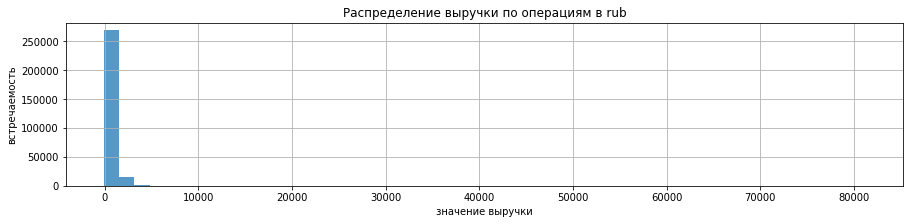

In [14]:
#построим гистограмму распределения выручки в rub

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 3))

# Строим гистограмму распределения
data[data['currency_code'] == 'rub']['revenue'].plot(
                    kind='hist', 
                    bins=50, 
                    alpha=0.75
                    )

# Настраиваем оформление графика
plt.title('Распределение выручки по операциям в rub')
plt.xlabel('значение выручки')
plt.ylabel('встречаемость')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Не очень информативно, но видно признаки "правого" хвоста.

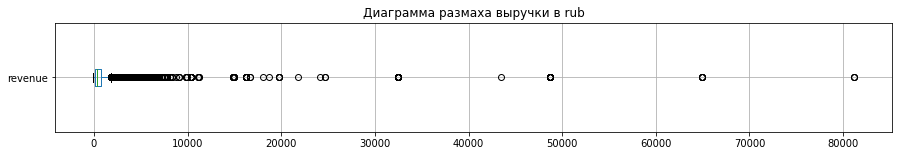

In [15]:
# построим диаграмму размаха

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 2))

# Строим диаграмму размаха значений в столбце balance
data[data['currency_code'] == 'rub'].boxplot(column='revenue', vert=False)

# Добавляем заголовок и метки оси
plt.title('Диаграмма размаха выручки в rub')

# Выводим график
plt.show()

Теперь видно выбросы. Определим процентиль, за которым они находятся, чтобы их отсеять.

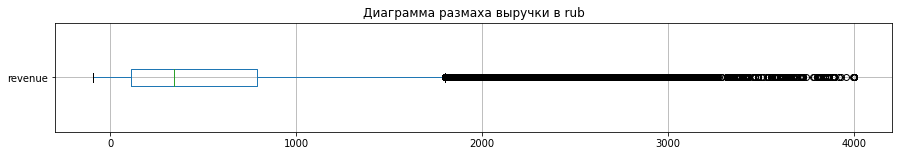

In [16]:
# построим диаграмму размаха но уже для значений в пределах 99 процентиля

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 2))

# Строим диаграмму размаха значений в столбце balance
data[ (data['currency_code'] == 'rub') & (data['revenue'] <= data['revenue'].quantile(0.99))].boxplot(column='revenue', vert=False)

# Добавляем заголовок и метки оси
plt.title('Диаграмма размаха выручки в rub')

# Выводим график
plt.show()

99-й процентиль отсеивает достаточный диапазон ненужных нам выбросов. Можем отфильтровать по нему датафрейм.

In [17]:
#изучим строки с отрицательной выручкой (такие только по rub, поэтому фильтр по валюте не нужен)
print('Количество строк с отрицательной выручкой:', data[data['revenue']<0].shape[0])
print('Доля таких строк в датафрейме:', round(data[data['revenue']<0].shape[0] / data.shape[0],3))

Количество строк с отрицательной выручкой: 381
Доля таких строк в датафрейме: 0.001


Строки с отрицательной выручкой можно удалить, т.к. их доля несущественна.

In [18]:
# уберём строки с выбросами по заказам в rub и с отрицательными значениями из датафрейма

# определим 99 процентиль в переменную
percentile_99 = data['revenue'].quantile(0.99)

# Удаление строк, где revenue больше 99-го процентиля для rub и меньше 0
data = data[  ~((data['currency_code'] == 'rub') & (data['revenue'] > percentile_99))   &  (data['revenue']>=0)  ]

In [19]:
# проверим количество строк после удаления
print('Количество строк после удаления:', data.shape[0])
print('Всего удалено строк:', df_orders_size - data.shape[0], '(',round((df_orders_size - data.shape[0])/data.shape[0] * 100,2),'% )')

Количество строк после удаления: 289898
Всего удалено строк: 951 ( 0.33 % )


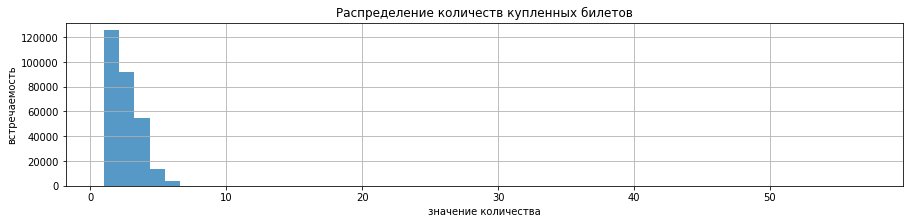

In [20]:
#построим гистограмму распределения для количества купленных билетов (валюта, наверное, здесь не важна?)

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 3))

# Строим гистограмму распределения
data['tickets_count'].plot(
                    kind='hist', 
                    bins=50, 
                    alpha=0.75
    )


# Настраиваем оформление графика
plt.title('Распределение количеств купленных билетов')
plt.xlabel('значение количества')
plt.ylabel('встречаемость')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Признаки "правого" хвоста с выбросами.

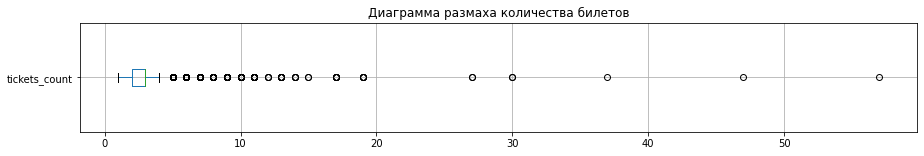

In [21]:
# построим диаграмму размаха для количества купленных билетов

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 2))

# Строим диаграмму размаха значений в столбце balance
data.boxplot(column='tickets_count', vert=False)

# Добавляем заголовок и метки оси
plt.title('Диаграмма размаха количества билетов')

# Выводим график
plt.show()

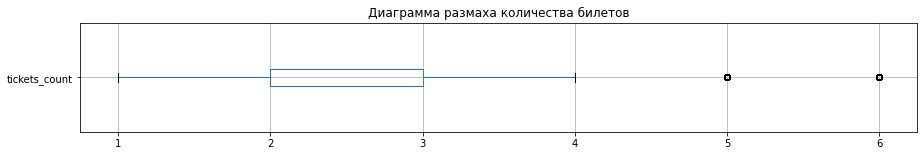

In [22]:
# построим диаграмму размаха для количества купленных билетов, но в пределах 99 процентиля

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 2))

# Строим диаграмму размаха значений в столбце balance
data[data['tickets_count'] <= data['tickets_count'].quantile(0.99)].boxplot(column='tickets_count', vert=False)

# Добавляем заголовок и метки оси
plt.title('Диаграмма размаха количества билетов')

# Выводим график
plt.show()

Так то лучше. Отфильтруем датафрейм от этих выбросов.

In [23]:
# уберём строки с выбросами количеству билетов

# определим 99 процентиль в переменную
percentile_99 = data['tickets_count'].quantile(0.99)

# Удаление строк, где revenue больше 99-го процентиля для rub и меньше 0
data = data[data['tickets_count'] <= percentile_99]

In [24]:
# проверим количество строк после удаления
print('Количество строк после удаления:', data.shape[0])
print('Всего удалено строк:', df_orders_size - data.shape[0], '(',round((df_orders_size - data.shape[0])/data.shape[0] * 100,2),'% )')

Количество строк после удаления: 289711
Всего удалено строк: 1138 ( 0.39 % )


Далее оптимизируем типы данных.

In [25]:
# поменяем типы столбцов с датой и временем, приведём к типу datetime
data['created_dt_msk'] = pd.to_datetime(data['created_dt_msk'])
data['created_ts_msk'] = pd.to_datetime(data['created_ts_msk'])

# и в датасете с курсами тоже
df_tenge['data'] = pd.to_datetime(df_tenge['data'])

In [26]:
# оптимизируеум типы целочисленных столбцов
columns_to_optimize = ['order_id', 'event_id', 'age_limit', 'tickets_count']
for column in columns_to_optimize:
    data[column] = pd.to_numeric(data[column], downcast='integer')

In [27]:
# оптимизируеум типы остальных числовых столбцов
columns_to_optimize = ['revenue', 'total', 'days_since_prev', 'city_id', 'venue_id']
for column in columns_to_optimize:
    data[column] = pd.to_numeric(data[column], downcast='float')

In [28]:
# Оптимизируем тип данных в категориальных столбцах
columns_to_optimize = ['cinema_circuit', 'currency_code', 'device_type_canonical', 'event_type_main']
for column in columns_to_optimize:
    data[column] = data[column].astype('category')

In [29]:
# Взглянем на результаты оптимизации данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289711 entries, 0 to 290848
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                289711 non-null  int32         
 1   user_id                 289711 non-null  object        
 2   created_dt_msk          289711 non-null  datetime64[ns]
 3   created_ts_msk          289711 non-null  datetime64[ns]
 4   event_id                289711 non-null  int32         
 5   cinema_circuit          289711 non-null  category      
 6   age_limit               289711 non-null  int8          
 7   currency_code           289711 non-null  category      
 8   device_type_canonical   289711 non-null  category      
 9   revenue                 289711 non-null  float32       
 10  service_name            289711 non-null  object        
 11  tickets_count           289711 non-null  int8          
 12  total                   289711

Типы данных оптимизированы. Объём занимаемой памяти сократился на треть - с 55МB до 36MB.

Создадим несколько новых столбцов, необходимых для анализа:

:: столбец с выручкой в единой валюте (rub)

:: столбец, содержащий выручку с продажи одного билета на мероприятие

:: месяц оформления заказа

:: время года

In [30]:
# Создадим вспомогательные функцию для удобства использования
def create_rub_column(row):
    """
    Функция создаёт новый столбец со значением выручки в рублях,
    в зависимости от валюты заказа делает перевод по курсу или оставляет исходное значение выручки.
    """
    if row['currency_code']=='kzt':
        # ищем курс на дату в таблице с курсами
        target_row_index = df_tenge[df_tenge['data'] == row['created_dt_msk']].index[0]
        # сохраняем курс в переменную
        curs_on_date = df_tenge.loc[target_row_index, 'curs']
        return row['revenue']/100*curs_on_date
    else:
        return row['revenue']

def create_season(row):
    """
    Функция создаёт новый столбец со значением сезона (лето или осень)
    в зависимости от даты создания заказа.
    """
    if row['created_dt_msk'].month <= 8:
        return 'лето'
    elif row['created_dt_msk'].month in [9,10,11]:
        return 'осень'
    else:
        return 'ошибка'

In [31]:
# Создаём столбец revenue_rub с помощью функции create_rub_column
data['revenue_rub'] = data.apply(create_rub_column, axis=1)

In [32]:
# создадим столбец с выручкой с одного билета
data['one_ticket_revenue_rub'] = data['revenue_rub'] / data['tickets_count'] 

In [33]:
# создадим столбец с месяцем оформления заказа
data['month'] =  data['created_dt_msk'].dt.month

In [34]:
# создадим столбец с временем года
data['season'] = data.apply(create_season, axis=1)

In [35]:
# посчитаем количество заказов, в которых нет информации о мероприятиях
count_empty_events = data[data['event_name'].isna()].shape[0]
print('Количество заказов без данных о мероприятиях:', count_empty_events)
print('Доля таких строк в таблице:', round(count_empty_events / data.shape[0] * 100,2), '%')

Количество заказов без данных о мероприятиях: 238
Доля таких строк в таблице: 0.08 %


In [36]:
# пренебрежём этими строками, удалив их, т.к. их доля несущественна
data = data[~data['event_name'].isna()]

In [37]:
# проверим датасет
data.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,region_name,city_name,city_id,venue_id,venue_name,venue_address,revenue_rub,one_ticket_revenue_rub,month,season
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.939941,...,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",1521.939941,380.484985,8,лето
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.450012,...,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",289.450012,144.725006,7,лето
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.569946,...,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",1258.569946,314.642487,10,осень
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.490000,...,Североярская область,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",8.490000,4.245000,7,лето
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.410034,...,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",1390.410034,463.470011,10,осень


In [38]:
# проверим количество строк после удаления
print('Количество строк после предобработки:', data.shape[0])
print('Всего удалено строк:', df_orders_size - data.shape[0], '(',round((df_orders_size - data.shape[0])/data.shape[0] * 100,2),'% )')

Количество строк после предобработки: 289473
Всего удалено строк: 1376 ( 0.48 % )


Данные предобработаны и готовы к ИАД:
- проверены и обработаны пропуски
- проверены дубликаты
- проверены и обработаны выбросы
- созданы вспомогательные столбцы

Описание добавленных вспомогательных столбцов:

`revenue_rub` — выручка с заказа в единой валюте — российском рубле. Для рассчётов использовали датасет с информацией о курсе казахстанского тенге по отношению к российскому рублю final_tickets_tenge_df.csv (df_tenge).

`one_ticket_revenue_rub` —  выручка с продажи одного билета на мероприятие.

`month` — месяц оформления заказа .

`season` — столбец с информацией о сезонности, включая такие категории 'лето', 'осень' (другие сезоны не представлены в данных)

## Шаг 3. Исследовательский анализ данных

### 3.1. Анализ распределения заказов по сегментам и их сезонные изменения

Анализ дашборда показал, что в данных наблюдается сезонность — осенью количество заказов увеличивается. На данной стадии следует изучить изменение пользовательской активности или пользовательского интереса в связи с сезонностью. Будем анализировать  динамику по таким разрезам:

- тип мероприятия `event_type_main`;
- тип устройства `device_type_canonical`;
- категория мероприятий по возрастному рейтингу `age_limit`.

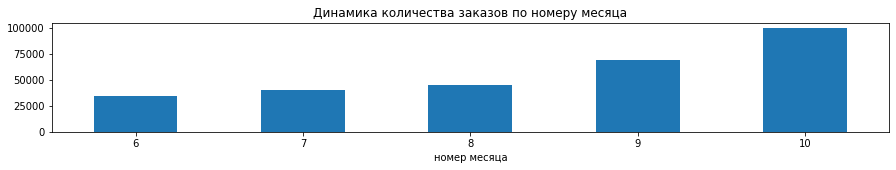

In [39]:
# найдём количество заказов для каждого месяца и выведем столбчатую диаграмму

# группируем для подсчёта
monthly_dynamic = data.groupby('month')['order_id'].count()

# строим график
plt.figure(figsize=(15, 2))

monthly_dynamic.plot(kind='bar', rot=0)

# Добавляем заголовок и метки оси
plt.title('Динамика количества заказов по номеру месяца')
plt.xlabel('номер месяца')

# Выводим график
plt.show()

Отчётливо видна возрастающая динамика.

Сравним распределения заказов за лето и за осень, в разрезе типа мероприятия,  типа устройства, категориям мероприятия по возрастному рейтингу.

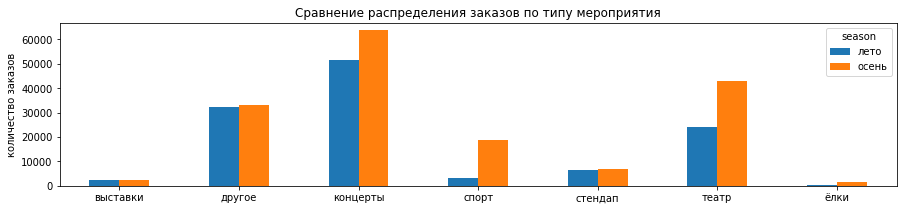

In [40]:
# Строим гистограмму распределения по типу мероприятия

grouped = data.groupby('event_type_main')['season'].value_counts().unstack(fill_value=0) 
grouped.plot(kind='bar', 
               title=f'Сравнение распределения заказов по типу мероприятия',
               legend=True,
               ylabel='количество заказов',
               xlabel='',
               rot=0,
               figsize=(15, 3))

# Выводим график
plt.show()

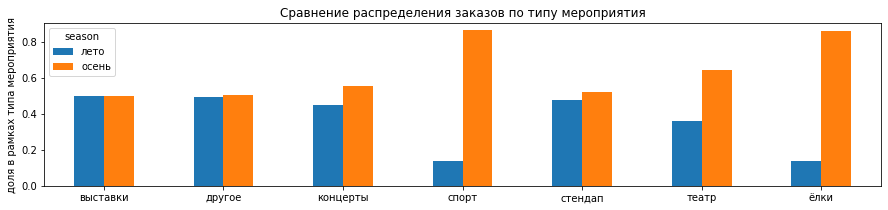

In [41]:
# Строим ту же гистограмму распределения по типу мероприятия, но в долях  в пределах типа

grouped = data.groupby('event_type_main')['season'].value_counts(normalize=True).unstack(fill_value=0) 
grouped.plot(kind='bar', 
               title=f'Сравнение распределения заказов по типу мероприятия',
               legend=True,
               ylabel='доля в рамках типа мероприятия',
               xlabel='',
               rot=0,
               figsize=(15, 3))

# Выводим график
plt.show()


Видим, что в таких категориях, как "выставки", "другое" изменений нет, доли одинаковые.

В категориях "концерты", "стендап", "театр" количество заказов незначительно больше.

Самые существенные изменения в категориях "спорт" и "ёлки" - здесь осеннее количество заказов кратно превышает летнее. С ёлками понятно - люди заранее приобретают билеты на новоготние ёлки. Со спортом пока нет.

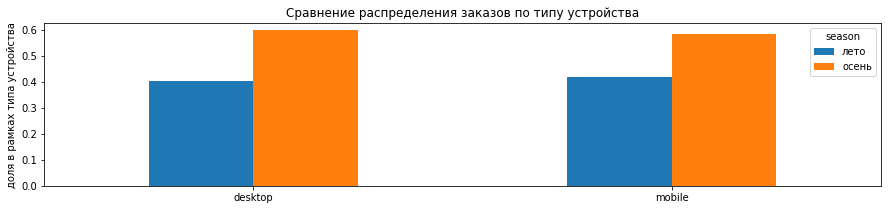

In [42]:
# Строим гистограмму распределения по типу устройства

grouped = data.groupby('device_type_canonical')['season'].value_counts(normalize=True).unstack(fill_value=0) 
grouped.plot(kind='bar', 
               title=f'Сравнение распределения заказов по типу устройства',
               legend=True,
               ylabel='доля в рамках типа устройства',
               xlabel='',
               rot=0,
               figsize=(15, 3))
## plt.grid()

# Выводим график
plt.show()

По типу устройств динамика синхронная у обоих устройств.

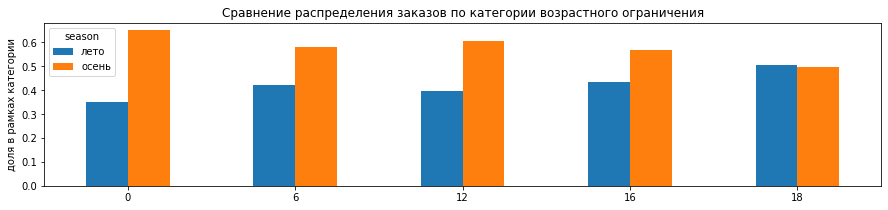

In [43]:
# Строим гистограмму распределения по типу устройства

grouped = data.groupby('age_limit')['season'].value_counts(normalize=True).unstack(fill_value=0) 
grouped.plot(kind='bar', 
               title=f'Сравнение распределения заказов по категории возрастного ограничения',
               legend=True,
               ylabel='доля в рамках категории',
               xlabel='',
               rot=0,
               figsize=(15, 3))

# Выводим график
plt.show()

Здесь видим, что осенью больше покупались билеты на мероприятия в категориях для детей. Наибольшее изменения в долях по категории "0", количество заказов по этой категории за осень в два раза больше, чем летом.

Изучим изменение выручки с продажи одного билета в зависимости от типа мероприятия летом и осенью. Проверим, видна ли динамика средней стоимости билета в разрезе разных категорий мероприятий.

In [44]:
# Создадим сводную таблицу
pivot_table = pd.pivot_table(data, values='one_ticket_revenue_rub', index='event_type_main', columns='season', aggfunc='mean')

In [45]:
# необходимо сбросить индексы для построения диаграммы
pivot_table = pivot_table.reset_index()

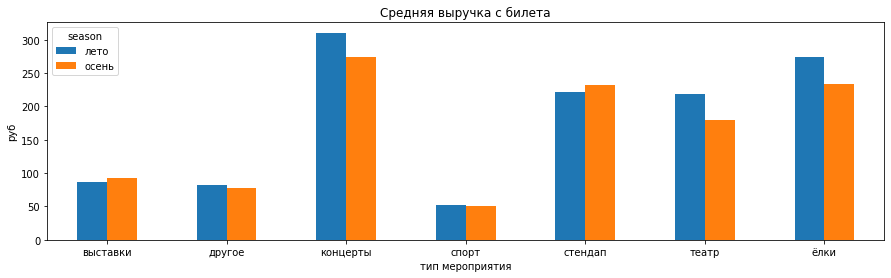

In [46]:
# Строим сравнительную столбчатую диаграмму
pivot_table.plot.bar(x='event_type_main', y=['лето', 'осень'], rot=0,  figsize=(15, 4))
plt.title('Средняя выручка с билета')
plt.xlabel('тип мероприятия')
plt.ylabel('руб')
plt.show()

Где-то прибавилось, где-то убавилось. Почти везде динамика лето-осень неположительная. Посчитаем изменения и выведем таблично.

In [47]:
# создадим доп. столбец в сводной таблице, где запишем разницу осеннего значения относительно летнего
pivot_table['delta'] = pivot_table['осень'] - pivot_table['лето'] 

In [48]:
# создадим доп. столбец с той же разницей, но в %
pivot_table['delta_%'] = round(pivot_table['осень'] /  pivot_table['лето'] *100 - 100,2)

In [49]:
# выведем результаты расчётов
pivot_table.sort_values(by='delta_%', ascending=False)

season,event_type_main,лето,осень,delta,delta_%
0,выставки,86.716646,92.374111,5.657465,6.52
4,стендап,221.316657,232.626360,11.309703,5.11
3,спорт,52.022591,50.060136,-1.962455,-3.77
1,другое,81.443356,77.372864,-4.070492,-5.00
2,концерты,310.493494,274.553183,-35.940311,-11.58
6,ёлки,274.749550,234.200451,-40.549099,-14.76
5,театр,218.710939,179.675927,-39.035012,-17.85


Почти во всех категориях мероприятий кроме выставок и стендапов наблюдается просадка по средней выручке с билета.

Сильнее всего уменьшился показатель для театров - минус 17,85%.
Дальше концерты и ёлки - изменение более 10% в отрицательную сторону. Спорт и "другое" около -5%. 

Исходя из увиденной статистики, снижение средней выручки кажется явлением, не зависящем от категории мероприятия.

### 3.2. Осенняя активность пользователей

Изучим активность пользователей осенью 2024 года. В данных имеются только два месяца - сентябрь и октябрь.

Посмотрим на дневную динамику таких показателей, как:
- общее число заказов
- количество активных пользователей за день
- среднее число заказов на одного пользователя
- средняя стоимость одного билета

In [50]:
# отфильтруем
data_fall = data[data['season']=='осень']

# создадим сводную таблицу с подневной динамикой числа заказов и количества активных пользователей
pivot_orders = pd.pivot_table(data_fall, index='created_dt_msk', aggfunc={'order_id': 'count', 'user_id': 'nunique', 'one_ticket_revenue_rub': 'mean'})

# отресетим индекс для удобства
pivot_orders = pivot_orders.reset_index()

In [51]:
# проверим таблицу
pivot_orders.head(3)

,created_dt_msk,one_ticket_revenue_rub,order_id,user_id
0,2024-09-01,206.693099,1346,569
1,2024-09-02,193.945947,1384,577
2,2024-09-03,81.668451,5101,781


In [52]:
#переименуем колонки
pivot_orders = pivot_orders.rename(columns={'order_id': 'orders_count', 'user_id': 'DAU'})

In [53]:
# добавим столбец, где посчитаем количество заказов на одного пользователя
pivot_orders['orders_per_user'] = pivot_orders['orders_count'] /  pivot_orders['DAU'] 

In [54]:
# взглянем на таблицу
pivot_orders.head()

,created_dt_msk,one_ticket_revenue_rub,orders_count,DAU,orders_per_user
0,2024-09-01,206.693099,1346,569,2.365554
1,2024-09-02,193.945947,1384,577,2.398614
2,2024-09-03,81.668451,5101,781,6.531370
3,2024-09-04,181.063385,1766,685,2.578102
4,2024-09-05,193.564384,1950,743,2.624495


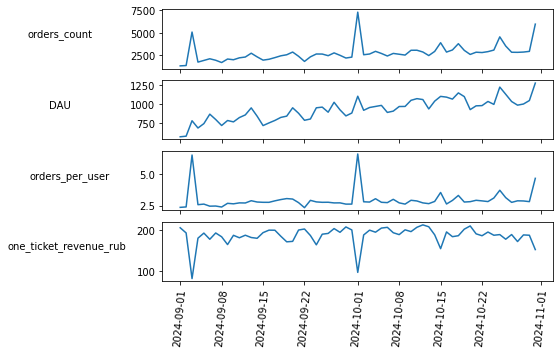

In [55]:
# построим несколько визуализаций полученных данных и сравним динамики

x = pivot_orders['created_dt_msk']
y1 = pivot_orders['orders_count']
y2 = pivot_orders['DAU']
y3 = pivot_orders['orders_per_user']
y4 = pivot_orders['one_ticket_revenue_rub']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(7, 5))
ax1.plot(x, y1)
ax1.set_ylabel(y1.name, rotation=0, labelpad=70)  
ax2.plot(x, y2)
ax2.set_ylabel(y2.name, rotation=0, labelpad=70)
ax3.plot(x, y3)
ax3.set_ylabel(y3.name, rotation=0, labelpad=70)
ax4.plot(x, y4)
ax4.set_ylabel(y4.name, rotation=0, labelpad=70)

ax4.tick_params("x", rotation=85)


Количество заказов и DAU растут, **особенно DAU**. Количество заказов на пользователя остаётся на одном уровне. Есть короткие пики. Динамика средней выручки с одного чека тоже примерно один уровень, есть впадины, синхронно с пиками по общему количеству заказов и количеству заказов на пользователя. Такие пики могут говорить нам, что в эти моменты (их два на графиках) было приобретено большое количество недорогих билетов. Либо, что тоже вероятно, пики могут быть следствием какого-то программного или иного фактора, не связанного с целями функционирования ресурса. Видна периодичность пиков - самое начало месяца. Первого ноября графики тоже "заходят" на пики.

Далее попробуем изучить "недельную цикличность". Выделим день недели и сравним пользовательскую активность в будни и выходные.

In [56]:
# выделим день недели для каждой даты
data_fall['weekday'] = data_fall['created_dt_msk'].dt.weekday+1

/tmp/ipykernel_63/2777062391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fall['weekday'] = data_fall['created_dt_msk'].dt.weekday+1


In [57]:
# пропишем категории "будние дни" и "выходные дни"
data_fall['day_cat'] = data_fall['weekday'].apply(lambda w: 'будние дни' if w < 6 else 'выходные дни')

/tmp/ipykernel_63/627098866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fall['day_cat'] = data_fall['weekday'].apply(lambda w: 'будние дни' if w < 6 else 'выходные дни')


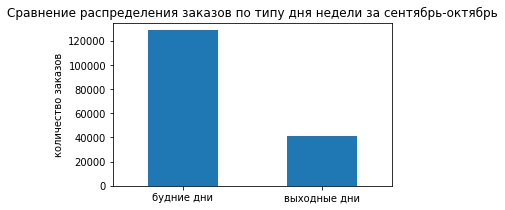

In [58]:
# сравним количество заказов в категориях "будние дни" и "выходные дни" с помощью столбчатой диаграммы

grouped = data_fall.groupby('day_cat')['order_id'].count()
grouped.plot(kind='bar', 
               title=f'Сравнение распределения заказов по типу дня недели за сентябрь-октябрь',
               legend=False,
               ylabel='количество заказов',
               xlabel='',
               rot=0,
               figsize=(5, 3))

# Выводим график
plt.show()

В будние дни заказов было в три раза больше, чем в выходные. <font color='blue'> Разница вполне объяснима тем, что будних дней просто больше в неделе, чем выходных.</font>

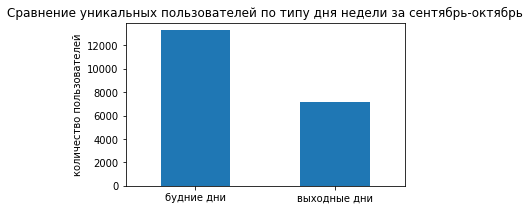

In [59]:
# сравним количество уникальных пользователей в категориях "будние дни" и "выходные дни" тоже с помощью столбчатой диаграммы
grouped = data_fall.groupby('day_cat')['user_id'].nunique()
grouped.plot(kind='bar', 
               title=f'Сравнение уникальных пользователей по типу дня недели за сентябрь-октябрь',
               legend=False,
               ylabel='количество пользователей',
               xlabel='',
               rot=0,
               figsize=(5, 3))

# Выводим график
plt.show()

Похожая ситуация. Уникальных пользователей в будние дни было в два раза больше, чем в выходные.

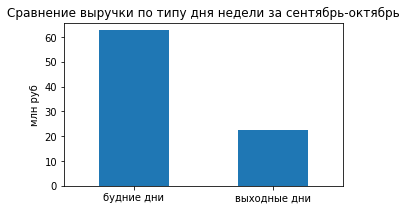

In [60]:
# сравним выручку в категориях "будние дни" и "выходные дни" тоже с помощью столбчатой диаграммы
grouped = data_fall.groupby('day_cat')['revenue_rub'].sum()/1000000

#f = plt.figure()
#plt.ticklabel_format(style = 'plain')

grouped.plot(kind='bar', 
               title=f'Сравнение выручки по типу дня недели за сентябрь-октябрь',
               legend=False,
               ylabel='млн руб',
               xlabel='',
               rot=0,
               figsize=(5, 3)
             # ,ax=f.gca()
                )
# Выводим график
plt.show()


Выручка по выходным дням в три раза больше. Похоже, в выходные дни мало кто интересуется покупкой билетов.

Посмотрим на те же показатели, но в разрезе каждого дня недели.

In [61]:
# сначала сгруппируем удобно данные
weekday_metrics = data_fall.groupby('weekday').agg({'order_id':'count', 'user_id':'nunique', 'revenue_rub':'sum'})

In [62]:
# сбросим индекс
weekday_metrics = weekday_metrics.reset_index()

In [63]:
#переименуем колонки
weekday_metrics = weekday_metrics.rename(columns={'order_id': 'orders_count', 'user_id': 'users_count'})

Text(0.5, 0, 'день недели')

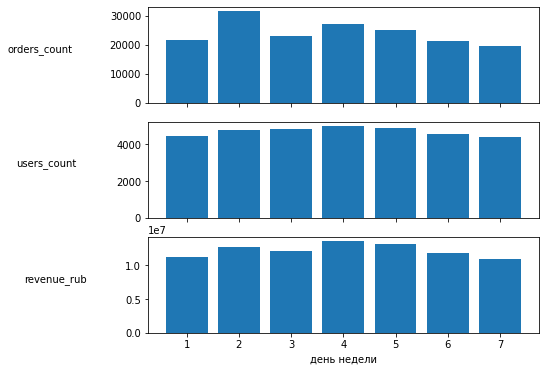

In [64]:
# визуализируем

x = weekday_metrics['weekday']

fig, axs = plt.subplots(3, 1, sharex=True, figsize=(7, 6))

axs[0].bar(x, weekday_metrics['orders_count'])
axs[0].set_ylabel('orders_count', rotation=0, labelpad=70)  

axs[1].bar(x, weekday_metrics['users_count'])
axs[1].set_ylabel('users_count', rotation=0, labelpad=70)  

axs[2].bar(x, weekday_metrics['revenue_rub'])
axs[2].set_ylabel('revenue_rub', rotation=0, labelpad=70)  

plt.xlabel('день недели')



По построенной визуализации можем отметить, что активность пользователей в совокупности проявляется преимущественно в середине недели. Такая динамика видна для каждого из трёх показателей.

Стоит заметить, что для количества заказов выделяется также вторник, при этом на другие метрики это не повлияло. Должно быть, массовые закупки сказались (те самые, которые в пиках).

Дополнительно можно отметить, что на графиках дневной динамики не наблюдается выраженная недельная цикличность, графики плавные, есть только характерные пики на началах месяца.

---
Подитожим. Осенняя динамика по заказам в целом положительная. Есть кратковременные подозрительные пики/впадины, все попадают на начало каждого месяца. Пользователи сервиса больше склонны к активности в середине недели, чем в выходные или начало недели.

###  3.3. Популярные события и партнёры

Посмотрим, как события распределены по регионам и партнёрам. Это позволит выделить ключевые регионы и партнёров, которые вносят наибольший вклад в выручку.

Для каждого региона посчитаем уникальное количество мероприятий и общее число заказов. Попытаемся определить, в каких регионах предлагается наибольшее разнообразие мероприятий.

In [65]:
# создадим сводную таблицу с районами
regions_pivot_table = pd.pivot_table(data, index='region_name', aggfunc={'event_id': 'nunique', 'order_id': 'count'})

# отресетим индекс для удобства
regions_pivot_table = regions_pivot_table.reset_index()

In [66]:
# посмотрим статистику по разнообразию мероприятий и количеству заказов
regions_pivot_table[['event_id','order_id']].describe()

,event_id,order_id
count,81.000000,81.000000
mean,275.654321,3573.740741
std,791.957751,11247.935329
min,2.000000,7.000000
25%,17.000000,276.000000
50%,76.000000,832.000000
75%,167.000000,2577.000000
max,5964.000000,90646.000000


Наибольшее разнообразие мероприятий - 5964. В среднем по всем имеющимся регионам около 80 мероприятий. Минимальное разнообразие - 2 мероприятия. Распределение неравномерное, максимум говорит о наличии регионов с явно-выделяющимся разнообразием мероприятий.

По количеству заказов распределение иное. Есть как очень маленькое количество заказов по региону - 7 шт, так и очень большое - 90646 шт., это при медианном значении в 832 заказал, т.е. в среднем около 1000 заказов на регион. Какой-то или какие-то регионы явно выделяются большим количеством заказов.

In [67]:
# добавим столбцы с долями, чтобы эффективнее оценивать вклад регионов в статистику

#посчитаем общие количества мероприятий и заказов
events_number = regions_pivot_table['event_id'].sum()
orders_number = regions_pivot_table['order_id'].sum()

# добавим столбцы
regions_pivot_table['events_share'] = regions_pivot_table['event_id'] / events_number
regions_pivot_table['orders_share'] = regions_pivot_table['order_id'] / orders_number

In [68]:
# выведем топ регионов по разнообразию мероприятий
regions_pivot_table[['region_name','event_id','events_share']].sort_values(by='event_id', ascending=False).head(15)

,region_name,event_id,events_share
23,Каменевский регион,5964,0.267109
60,Североярская область,3804,0.170369
77,Широковская область,1226,0.054909
57,Светополянский округ,1068,0.047832
52,Речиновская область,701,0.031396
74,Травяная область,683,0.030589
11,Горицветская область,551,0.024678
61,Серебринская область,541,0.024230
78,Яблоневская область,534,0.023916
69,Тепляковская область,529,0.023692


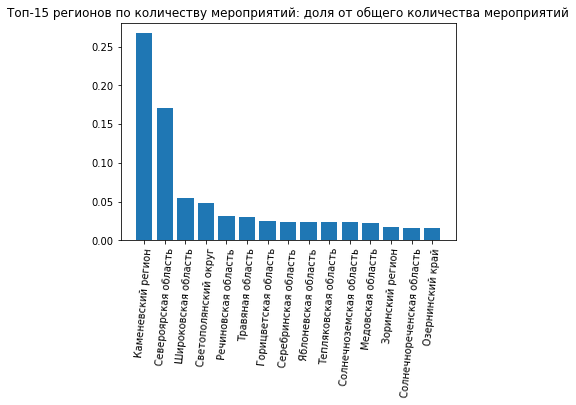

In [81]:
# визуализируем
# создадим набор данных для диаграммы
regions_events = regions_pivot_table[['region_name','event_id','events_share']].sort_values(by='event_id', ascending=False).head(15)

# Создание столбчатой диаграммы
plt.bar(regions_events['region_name'], regions_events['events_share'])

plt.xticks(rotation=85)

plt.title('Топ-15 регионов по количеству мероприятий: доля от общего количества мероприятий')
plt.show()

Видим явных лидеров по разнообразию мероприятий:

(в порядке убывания лидерства)

- Каменевский регион - 5964  мероприятия, более четверти от общего числа мероприятий
- Североярская область	- 3804 мероприятия

Далее можем отметить:
- Широковская область	1226 мероприятий
- Светополянский округ 1068 мероприятий

Со следующей позиции показатель уже 700 и уменьшается намного плавнее.


In [82]:
# выведем топ регионов по количеству заказов
regions_pivot_table[['region_name','order_id','orders_share']].sort_values(by='order_id', ascending=False).head(10)

,region_name,order_id,orders_share
23,Каменевский регион,90646,0.313141
60,Североярская область,43841,0.151451
77,Широковская область,16371,0.056554
42,Медовская область,13898,0.048011
45,Озернинский край,10474,0.036183
57,Светополянский округ,7560,0.026116
41,Малиновоярский округ,6612,0.022842
52,Речиновская область,6288,0.021722
64,Солнечноземская область,6248,0.021584
78,Яблоневская область,6171,0.021318


Явные лидеры по количеству заказов:

- Каменевский регион(90646 заказов), почти треть от общего числа заказов совершена в это регионе

и
- Североярская область(43841 заказ), 15% от всех заказов

Выделить можно всего 5 регионов, дальше разница в заказах уменьшается намного плавнее. Т.е. к указанным двум регионам в топе можно ещё добавить:

Широковская область (16371 заказ)

Медовская область (13898 заказов)

Озернинский край (10474)

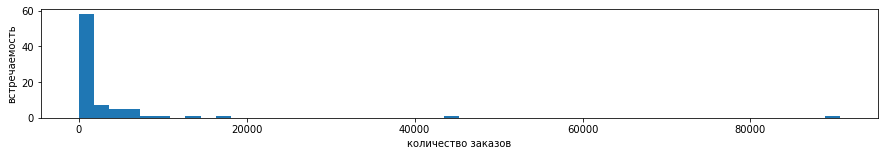

In [83]:
# ещё можем посмотреть на распределение разнообразия мероприятий и количеств заказов

# Диаграмма распределения количеств заказов
regions_pivot_table['order_id'].plot(kind='hist'
                                    ,figsize=(15, 2)
                                    ,bins=50
                                    )
plt.xlabel('количество заказов')
plt.ylabel('встречаемость')
plt.show()

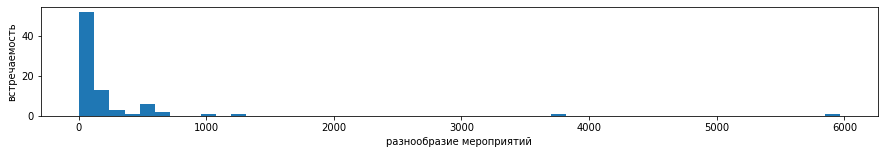

In [84]:
# Диаграмма распределения разнообразия мероприятий
regions_pivot_table['event_id'].plot(kind='hist'
                                    ,figsize=(15, 2)
                                    ,bins=50
                                    )
plt.xlabel('разнообразие мероприятий')
plt.ylabel('встречаемость')
plt.show()

Гистограммы очень схожи: бОльшая часть данных сосредоточена в четвероти от всех возможных значений, и эта четверть возле 0 на гистограммах.

<font color='purple'> **Перечисленные регионы отметим, как регионы, представившие наибольшее разнообразие мероприятий. Кроме Медовской области и Озерницкого края - там заказов много, но мероприятия не так разнообразны.**</font>

---
Для каждого билетного партнёра посчитаем общее число уникальных мероприятий, обработанных заказов и суммарную выручку с заказов билетов. Попробуем выделить наиболее активных партнёров.

In [85]:
# создадим сводную таблицу с партнёрами
partners_pivot_table = pd.pivot_table(data, index='organizers', aggfunc={'event_id': 'nunique', 'order_id': 'count','revenue_rub':'sum'})
# отресетим индекс для удобства
partners_pivot_table = partners_pivot_table.reset_index()

In [86]:
# добавим столбцы с долями, чтобы эффективнее оценивать вклад регионов в статистику

#посчитаем общие количества мероприятий и заказов
events_number = partners_pivot_table['event_id'].sum()
orders_number = partners_pivot_table['order_id'].sum()
revenue_rub_total = partners_pivot_table['revenue_rub'].sum()

# добавим столбцы
partners_pivot_table['events_share'] = partners_pivot_table['event_id'] / events_number
partners_pivot_table['orders_share'] = partners_pivot_table['order_id'] / orders_number
partners_pivot_table['revenue_rub_share'] = partners_pivot_table['revenue_rub'] / orders_number

In [87]:
# посмотрим на таблицу
partners_pivot_table

,organizers,event_id,order_id,revenue_rub,events_share,orders_share,revenue_rub_share
0,№1000,3,32,19261.579956,0.000134,0.000111,0.066540
1,№1001,2,12,4484.180054,0.000090,0.000041,0.015491
2,№1002,2,7,1461.530006,0.000090,0.000024,0.005049
3,№1003,1,7,4019.889893,0.000045,0.000024,0.013887
4,№1004,1,7,1971.929993,0.000045,0.000024,0.006812
...,...,...,...,...,...,...,...
4281,№995,1,2,1365.520020,0.000045,0.000007,0.004717
4282,№996,2,4,2905.760071,0.000090,0.000014,0.010038
4283,№997,2,24,23825.819977,0.000090,0.000083,0.082308
4284,№998,6,857,826716.862305,0.000269,0.002961,2.855938


Всего 4286 партрёнов. Можем выделить топовые 5% от этого количества по каждой метрике, и далее найти пересечение получившихся множеств партнёров. Так мы возможно сможем выделить наиболее активных партнёров.

In [88]:
# обозначим количество отбираемого топа
top_limit = round(partners_pivot_table.shape[0] / 100 * 5)


# сформируем множества

## топ по количеству мероприятий
top_partners_by_events = partners_pivot_table[['organizers','event_id']].sort_values(by='event_id', ascending=False).head(top_limit)['organizers']
## топ по количеству заказов
top_partners_by_orders = partners_pivot_table[['organizers','order_id']].sort_values(by='order_id', ascending=False).head(top_limit)['organizers']
## топ по выручке
top_partners_by_revenue = partners_pivot_table[['organizers','revenue_rub']].sort_values(by='revenue_rub', ascending=False).head(top_limit)['organizers']


In [89]:
# пересечём множества
intersection = set(top_partners_by_events).intersection(set(top_partners_by_orders)).intersection(set(top_partners_by_revenue))

print('Определено наиболее активных партнёров, входящих в топ 5% по каждой из метрик:', len(intersection), ' шт.')


Определено наиболее активных партнёров, входящих в топ 5% по каждой из метрик: 65  шт.


In [90]:
print(f'Список наиболее активных партнёров из всех ',partners_pivot_table.shape[0],':')
print(intersection)

Список наиболее активных партнёров из всех  4286 :
{'№4353', '№1747', '№1714', '№1858', '№4892', '№4896', '№2842', '№1789', '№4421', '№1735', '№894', '№2121', '№1900', '№1874', '№4520', '№2282', '№2017', '№5019', '№4455', '№3301', '№5051', '№1480', '№4018', '№4716', '№4131', '№4333', '№3436', '№1659', '№2619', '№4888', '№4403', '№1825', '№3722', '№1020', '№4415', '№5085', '№5017', '№4882', '№5048', '№1745', '№1494', '№1531', '№2094', '№4086', '№2671', '№1944', '№4837', '№4364', '№3083', '№4077', '№3502', '№4366', '№5024', '№1050', '№1037', '№2234', '№1738', '№2378', '№1456', '№2648', '№4377', '№1166', '№2735', '№5047', '№4887'}


In [91]:
# выведем дополнительно топы

partners_metrics = [ ['organizers','event_id','events_share'] 
                    ,['organizers','order_id','orders_share'] 
                    ,['organizers','revenue_rub','revenue_rub_share'] 
                    ]

for columns in partners_metrics:
    print(partners_pivot_table[columns].sort_values(by=columns[1], ascending=False).head(10))
    print()

     organizers  event_id  events_share
870       №1874       121      0.005419
655       №1659       120      0.005374
734       №1738       117      0.005240
4016      №5024       117      0.005240
2524      №3529       113      0.005061
3541      №4549       110      0.004927
2431      №3436       109      0.004882
741       №1745       104      0.004658
3413      №4421        98      0.004389
3643      №4651        93      0.004165

     organizers  order_id  orders_share
527       №1531      9745      0.033665
1117      №2121      4738      0.016368
3047      №4054      4354      0.015041
3541      №4549      3972      0.013721
3829      №4837      3368      0.011635
3079      №4086      3318      0.011462
3942      №4950      3212      0.011096
3395      №4403      3036      0.010488
4077      №5085      3005      0.010381
1374      №2378      2886      0.009970

     organizers   revenue_rub  revenue_rub_share
3047      №4054  4.585830e+06          15.841995
3942      №4950  4.3

- ТОП-5 партнёров по разнообразию мероприятий : №1874, №1659, №1738, №5024, №3529

- ТОП-5 партнёров по количеству заказов: №1531, №2121, №4054, №4549, №4837

- ТОП-5 партнёров по выручке: №4054, №4950, №4086, №4403, №2121

<font color='purple'>**Наибольшие отличия в сравнении по выручке. Пятёрка лидеров принесла больше половины всей выручки. По абсолютному количеству заказов выделяется №1531.**</font>

## Шаг 4. Статистический анализ данных

Заказчик предполагает, что большую активность в сервисе проявляют пользователи мобильных устройств. Далее проведём статистическое сравнение групп по типу устройства, попробуем проверить это предположение.


Сначала проверим гипотезу, что среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств. Сформулируем H0 и H1 для пользователей мобильного приложения (группа B) и для пользователей стационарных устройств (группа A):

- H0 -  среднее количество заказов на одного пользователя одинаковое у обеих групп
- H1 -  cреднее количество заказов на одного пользователя в группе B больше, чем в группе А

Для применения теста необходимо выделить группы пользователей A и B, посчитав для каждого пользователя количество совершённых заказов.

Используем данные только за осенний период.

In [92]:
# сгруппируем данные для анализа, посчитаем количество заказов на каждого пользователя
user_orders = data_fall.groupby('user_id').agg({'device_type_canonical':'first', 'order_id':'count'})

In [93]:
# сравним размеры получившихся групп
A_size = user_orders[user_orders['device_type_canonical']=='desktop'].shape[0]
B_size = user_orders[user_orders['device_type_canonical']=='mobile'].shape[0]

A_size, B_size

(2635, 13210)

Размер группы B (13210) почти в 4 раза больше размера группы A(2635). Нужно определить подходящий статистический тест для сравнений групп.

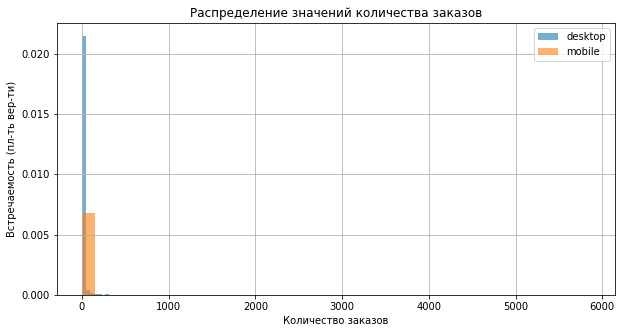

In [94]:
#Проверим распределение выборок

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 5))

# Строим гистограмму распределения
for device in user_orders['device_type_canonical'].sort_values().unique():
    user_orders[user_orders['device_type_canonical'] == device]['order_id'].plot(
                    kind='hist', 
                    bins=40, 
                    alpha=0.60,
                    density=True #флаг отображения плотности вероятности
    )

# Настраиваем оформление графика
plt.title('Распределение значений количества заказов')
plt.xlabel('Количество заказов')
plt.ylabel('Встречаемость (пл-ть вер-ти)')
# Добавляем сетку графика
plt.grid()

plt.legend(user_orders['device_type_canonical'].sort_values().unique())
# Выводим график
plt.show()

Формы видимых частей распределения у групп схожи, у обоих групп данные преимущественно собраны возле нуля и есть признаки  выбросов вправо для какой-то из групп или для обеих. Распределения нельзя назвать нормальными.

In [95]:
# определим группу значений A
A = user_orders[user_orders['device_type_canonical'] == 'desktop']['order_id']

# определим группу значений B
B = user_orders[user_orders['device_type_canonical'] == 'mobile']['order_id']

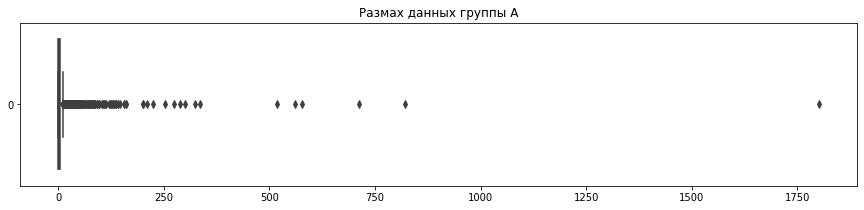

In [96]:
# построим диаграмму размаха группы А
plt.figure(figsize=(15,3))

sns.boxplot(data=A, orient='h')

plt.title('Размах данных группы A')
plt.show()


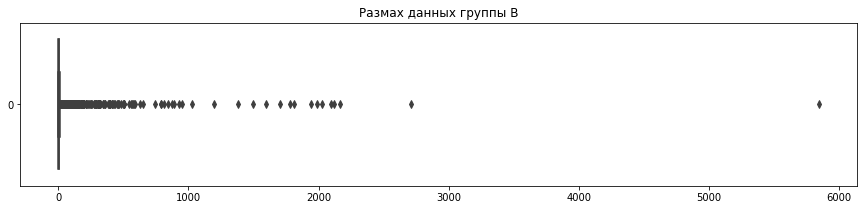

In [97]:
# построим диаграмму размаха группы B
plt.figure(figsize=(15,3))

sns.boxplot(data=B, orient='h') #, x=user_orders['order_id'])

plt.title('Размах данных группы B')
plt.show()

In [98]:
# Взглянем на дисперсию значений в группах.
A.std(), B.std()

(49.941371276679966, 88.56072126492936)

Выборочная дисперсия группы B почти в два раза больше.

Отсечём выбросы, чтобы выровнять дисперсию и не возникло проблем с применением статистического теста. Для применения больше подходит Т-Тест Уэлча, т.к. выборки имеют разный размер.

In [99]:
# Отсечём выбросы по процентилю 

# определим процентили
A_pricentile_99 = A.quantile(0.99)
B_pricentile_99 = B.quantile(0.99)

# фильтруем по процентилям
A = A[A<A_pricentile_99]
B = B[B<B_pricentile_99]

In [100]:
# снова сравним дисперсии
A.std(), B.std()

(12.871641744366523, 11.735107465359002)

Теперь возможно и обычный Т-Тест подойдёт. Приступим к статистическому сравнению.

In [101]:
# сначала Т-Тест Уэлча

alpha = 0.05 # стандартный уровень значимости (вероятность ошибки 1 рода - 5%)

stat_ttest, p_value_ttest = ttest_ind(
    B, 
    A, 
    equal_var=False, # Уэлча
    alternative='greater' # "B greater  A"
) 

if p_value_ttest > alpha:
    print(f'pvalue={p_value_ttest} > {alpha}')
    print('Нулевая гипотеза находит подтверждение!')
else:
    print(f'pvalue={p_value_ttest} < {alpha}')
    print('Нулевая гипотеза не находит подтверждения!')

pvalue=0.9853743654692466 > 0.05
Нулевая гипотеза находит подтверждение!


In [102]:
# выведем дополнительно на обзор среднее количество заказов для каждоый группы пользователей
A.mean(), B.mean()

(6.148389570552148, 5.554867324309857)

In [103]:
# теперь Т-тест Стьюдента

alpha = 0.05 # стандартный уровень значимости (вероятность ошибки 1 рода - 5%)

stat_ttest, p_value_ttest = ttest_ind(
    B, 
    A, 
    alternative='greater' # "B greater  A"
) 

if p_value_ttest > alpha:
    print(f'pvalue={p_value_ttest} > {alpha}')
    print('Нулевая гипотеза находит подтверждение!')
else:
    print(f'pvalue={p_value_ttest} < {alpha}')
    print('Нулевая гипотеза не находит подтверждения!')

pvalue=0.9898113392227322 > 0.05
Нулевая гипотеза находит подтверждение!


Результат схож с предыдущим статистическим тестом.

Похоже, предположение заказчика не оправдывается. Фактически среднее количество заказов больше для пользователей стационарных устройств. Статистические тесты это подтверждают.

Но попробуем проанализировать ещё одну метрику для тех же групп - среднее время между заказами.

In [104]:
# определим группу значений A, отсеяв пропуски в целевом столбце, т.к. это помешает тесту
A = data_fall[(data_fall['device_type_canonical'] == 'desktop') & ~(data_fall['days_since_prev'].isna())]['days_since_prev']

# определим группу значений B, тоже отсеяв пропуски
B = data_fall[(data_fall['device_type_canonical'] == 'mobile') & ~(data_fall['days_since_prev'].isna())]['days_since_prev']

In [105]:
# сравним дисперсии и объёмы данных
A.std(), B.std(), A.shape[0],  B.shape[0]

(12.1132345, 13.386203, 33186, 127944)

Дисперсии схожи, но размеры выборок сильно отличаются. Здесь так же можем применить оба теста для уверенности.

In [106]:
# и конечно взглянем глазами на средние значения
A.mean(), B.mean()

(3.0349846, 3.783546)

Видим, что по среднему времени между заказами в абсолютных значениях лидирует группа A (чем меньше время между заказами, тем активнее пользователь), разница составляет почти один день. Сформулируем гипотезы и приступим к статистическому сравнению.

- H0 среднее время между заказами одинаково для обоих групп пользователей
- H1 среднее время между заказами у группы B меньше, чем у группы А

In [107]:
# Т-Тест Уэлча

alpha = 0.05 # стандартный уровень значимости (вероятность ошибки 1 рода - 5%)

stat_ttest, p_value_ttest = ttest_ind(
    B, 
    A, 
   equal_var=False, # Уэлча
    alternative='less' #
) 

if p_value_ttest > alpha:
    print(f'pvalue={p_value_ttest} > {alpha}')
    print('Нулевая гипотеза находит подтверждение!')
else:
    print(f'pvalue={p_value_ttest} < {alpha}')
    print('Нулевая гипотеза не находит подтверждения!')

pvalue=1.0 > 0.05
Нулевая гипотеза находит подтверждение!


In [108]:
# Т-Тест Стьюдента

alpha = 0.05 # стандартный уровень значимости (вероятность ошибки 1 рода - 5%)

stat_ttest, p_value_ttest = ttest_ind(
    B, 
    A, 
    alternative='less' # B less than A
) 

if p_value_ttest > alpha:
    print(f'pvalue={p_value_ttest} > {alpha}')
    print('Нулевая гипотеза находит подтверждение!')
else:
    print(f'pvalue={p_value_ttest} < {alpha}')
    print('Нулевая гипотеза не находит подтверждения!')

pvalue=1.0 > 0.05
Нулевая гипотеза находит подтверждение!


Видим, что оба теста подтверждают нулевую гипотезу, т.е. среднее время между заказами статистически одинаково для обеих групп пользователей. <font color='purple'>**Предположение заказчика можно смело опровергнуть.**</font>

## Шаг 5. Общий вывод и рекомендации

Проведено исследование данных крупного сервиса онлайн покупки билетов. Данные были представлены в виде трёх таблиц:

1 - таблица заказов, где указаны основные данные о заказах, даты, идентификаторы и некоторые характеристики пользователей, количество билетов и выручка.

2 - таблица мероприятий, где указано описание мероприятий, их организаторы, места их проведения (площадки и адреса).

3 - вспомогательная таблица с курсом kzt к rub для возможности приведения выручки первой таблицы к единой валюте.

Данные были изучены, оптимизированы и предобработаны в соответствии с целями проекта.

Наиболее востребованные мероприятия: концерты, театр, и "другое". По таким мероприятиям самое большое количество заказов, больше половины всех заказов. В осенний период подрос интерес ко всем мероприятиям этого типа, а также к мероприятиям типа спорт и ёлки.

Наблюдается увеличение средней выручки с чека к осени.

Активность пользователей к осени также растёт. Наиболее вероятное время активности пользователей - середина недели.

Динамика размера выручки с билета показывает намёки на уменьшение. Должно быть следствием роста пользовательской активности в сегменте недорогих мероприятий.

Среди регионов можно выделить Каменевский регион, Североярскую область, Широковскую область - в них совершена половина всех заказов.

Среди партнёров-организаторов явные лидеры №4054, №4950, №4086, №4403, №2121, эта пятёрка лидеров принесла больше половины всей выручки среди всех 4286 представленных партнёров. По абсолютному количеству заказов выделяется №1531 (3,5 % всех заказов).


Замечена странная активность в первых числах месяцев. Стоит дополнительно изучить это явление, не является ли это результатом каких-либо сбоев, или это характерная ежемесячная особенность на рынке подобных сервисов.

---
Предположения заказчика о том, что пользователи мобильных устройств более активны по сравнению с пользователями стационарных устройств, были опровергнуты в ходе статистических тестов. Несмотря не меньшую численность, пользователи стационарных устройств не менее активны.

Есть пользователи, совершившие аномально большие количества заказов за период всего в два месяца (от 2 до 6 тысяч). Стоит обратить на них внимание. Есть подозрение, что это могут быть перекупщики-спекулянты.

<font color='blue'> Рекомендации:

- в силу наблюдаемого притока категорий пользователей, предпочитающих семейные мероприятия, рекомендуется провести сезонную акцию, привлекающую внимание такой аудитории. Например, небольшую скидку при покупке от 3-х билетов на мероприятия в категориях до 12 лет.

- выдающихся партнёров можно каким-либо образом отметить за их достижения, чтобы мотивировать остальных партнёров проявлять большую активность.

- в связи с наблюдаемым сезонным интересом по типам мероприятий "спорт" и "ёлка" можно дополнительно прогреть информационный фон рекламой таких мерориятий.

- два столбца с датой кажутся избыточными в собираемых данных, один возможно стоит убрать.</font>